In [5]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 19.8 MB 719 kB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.1 MB 506 kB/s eta 0:00:01
     |████████████████████████████████| 499 kB 21.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [49]:
# import data from csv file for cost function
data = pd.read_csv('data.csv', header=None)
data = data.to_numpy()
global x, y
x = data[0, :]
y = data[1, :]

In [50]:
# function to be optimized
def target_function(answer):
    global x, y
    y_ans =  answer[0]*x**3 + answer[1]*x**2 + answer[2]*x + answer[3]*np.sin(answer[4]*x) + answer[5]*np.cos(answer[6]*x)
    return np.sum((y_ans - y)**2)

In [51]:
def y_ans(answer):
    global x
    return answer[0]*x**3 + answer[1]*x**2 + answer[2]*x + answer[3]*np.sin(answer[4]*x) + answer[5]*np.cos(answer[6]*x)


In [21]:

# generate random numbers in the range [0, 1]
def random_number():
    return random.random()  # random.random() generates a random number in the range [0, 1]

# generate random integer in the range [0, n]
def random_int(n):
    return random.randint(0, n)  # random.randint(a, b) generates a random integer in the range [a, b]


In [55]:
# convert a bit string to a real number in the range [lower, upper]
def bitstring_to_real(bitstring):
    answer = np.zeros(int(len(bitstring)/2), dtype=float)
    for i in range(len(bitstring)):
        if i % 2 == 0:
            answer[int(i/2)] = bitstring[i] + bitstring[i+1] / 10
    return answer
def bitstring_to_real_ba(bitstring):
    answer = np.zeros(int(len(bitstring)/8), dtype=float)
    for i in range(len(bitstring)):
        if i % 8 == 0:
            answer[int(i/8)] = 2**3* bitstring[i] + 2**2* bitstring[i+1] + 2**1* bitstring[i+2] + 2**0* bitstring[i+3] + 2**-1* bitstring[i+4] + 2**-2* bitstring[i+5] + 2**-3* bitstring[i+6] + 2**-4* bitstring[i+7]
    return answer

In [3]:
# create an initial population of random bit strings
def initial_population(pop_size, bitstring_length):
    return np.random.randint(10, size=(pop_size,bitstring_length))

def initial_population_ba(pop_size, bitstring_length):
    return np.random.randint(2, size=(pop_size,bitstring_length))

In [53]:
# calculate the fitness of a bit string, higher is better
def fitness(bitstring):
    x = bitstring_to_real(bitstring)
    y = target_function(x)
    return y

In [64]:
# mating Double Tournament Selection without replacing
def selection(population, tournament_size):
    selected_population = np.random.randint(len(population), size=tournament_size, dtype=int)

    tournament_list = np.zeros(tournament_size, dtype=float)
    for i in range(len(selected_population)):
        tournament_list[i] = fitness(population[selected_population[i]])
    
    # selecting the dead
    sum_tournament_list = np.sum(tournament_list)
    tournament_list = tournament_list / sum_tournament_list
    dead = population[np.random.choice(selected_population, 1, p=tournament_list)[0]]

    # selecting the beat

    tournament_list = 1 / tournament_list
    sum_tournament_list = np.sum(tournament_list)
    tournament_list = tournament_list / sum_tournament_list
    parent = population[np.random.choice(selected_population, 1, p=tournament_list)[0]]

    return parent, dead # return the best and the worst for parent and dead

In [19]:
# perform uniform crossover of two parents to create two children
def one_point_crossover(parent1, parent2):
    child1 = np.zeros(len(parent1), dtype=int)
    child2 = child1.copy()
    if random_number() < 0.9:
        cross_over_random_number = random_int(len(parent1))
        child1[0:cross_over_random_number] = np.copy(parent1[0:cross_over_random_number])
        child1[cross_over_random_number:] = np.copy(parent2[cross_over_random_number:])
        child2[0:cross_over_random_number] = np.copy(parent2[0:cross_over_random_number])
        child2[cross_over_random_number:] = np.copy(parent1[cross_over_random_number:])
    else:
        child1 = parent1.copy()
        child2 = parent2.copy()
    return [child1, child2]

In [30]:
def crossover(parent1, parent2):
    child1 = np.zeros(len(parent1), dtype=int)
    child2 = child1.copy()
    for i in range(len(parent1)):
        if random_number() < 0.5:
            child1[i] = parent1[i]
            child2[i] = parent2[i]
        else:
            child1[i] = parent2[i]
            child2[i] = parent1[i]
    return child1, child2

In [32]:
# mutate an individual
def mutation(bitstring, mutation_rate):
    if random_number() < mutation_rate:
        mutation_index = random_int(len(bitstring))
        if mutation_index >= len(bitstring):
            mutation_index = len(bitstring) - 1
        bitstring[mutation_index] = random_int(10)
    return bitstring

In [18]:
# genetic algorithm
def genetic_algorithm(pop_size, bitstring_length, mutation_rate, generations, tournament_size):
    # initialize population
    population = initial_population(pop_size, bitstring_length)
    # evaluate fitness
    # ranked_population = rank_by_fitness(population, lower, upper)
    # run the algorithm for the given number of generations
    for i in range(generations):
        print('Generation: ', i)
        # select parents
        parent1, dead1 = selection(population, tournament_size)
        parent2, dead2 = selection(population, tournament_size)
        # crossover parents
        children = one_point_crossover(parent1, parent2)
        child1 = children[0]
        child2 = children[1]
        # mutate children
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)

        for i in range(len(population)):
            if (population[i] == dead1).all():
                population[i] = np.copy(child1)
                break
        for i in range(len(population)):
            if (population[i] == dead2).all():
                population[i] = np.copy(child2)
                # print('replaced', i)
                break
        
        # print(population)
    best_sol = np.zeros(len(population[0]), dtype=int)
    best_cost = math.inf
    for i in population:
        if fitness(i) < best_cost:
            best_cost = fitness(i)
            best_sol = i
    return best_sol, population

In [19]:
# run the algorithm
if __name__ == '__main__':
    # problem configuration
    bitstring_length = 14
    # algorithm configuration
    pop_size = 100
    mutation_rate = 0.5
    generations = 50000
    tournament_size = 20
    # execute the algorithm
    best, population = genetic_algorithm(pop_size, bitstring_length, mutation_rate, generations, tournament_size)
    print("Done.")

Generation:  0
Generation:  1
Generation:  2
Generation:  3
Generation:  4
parent1 == parent2
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Generation:  16
Generation:  17
Generation:  18
Generation:  19
Generation:  20
Generation:  21
Generation:  22
Generation:  23
Generation:  24
Generation:  25
Generation:  26
Generation:  27
Generation:  28
Generation:  29
Generation:  30
Generation:  31
Generation:  32
Generation:  33
Generation:  34
Generation:  35
Generation:  36
Generation:  37
Generation:  38
Generation:  39
Generation:  40
Generation:  41
Generation:  42
Generation:  43
Generation:  44
Generation:  45
Generation:  46
Generation:  47
Generation:  48
Generation:  49
Generation:  50
Generation:  51
Generation:  52
Generation:  53
Generation:  54
Generation:  55
Generation:  56
Generation:  57
Generation:  58
Generation:  59
Generation:  60
Generation:  61

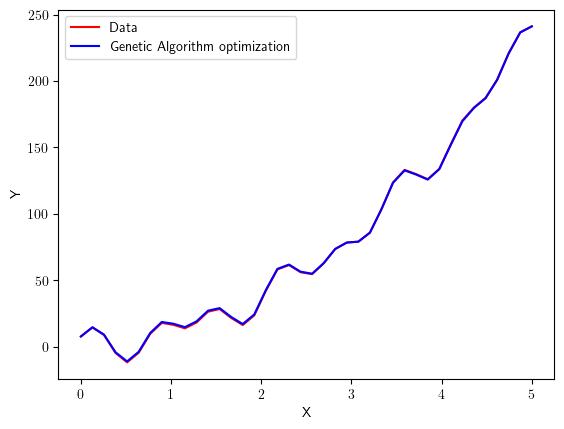

In [21]:
plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots()

ax.plot(x, y, 'r', label='Data')
ax.plot(x, y_ans(bitstring_to_real(best)), 'b', label='Genetic Algorithm optimization')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()

plt.show()

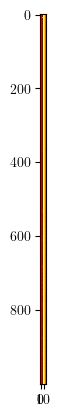

In [22]:
fig1, ax1 = plt.subplots()
ax1.imshow(population, cmap='hot', interpolation='nearest')
plt.show()


[[4 3 6 2 3 2 3 4 4 0 7 1 3 4]]


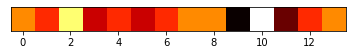

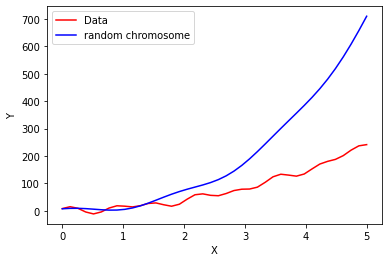

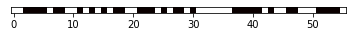

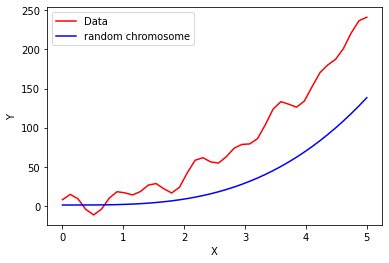

In [61]:
population = initial_population(1, 14)
print(population)
population_ba = initial_population_ba(1, 56)
fig1, ax1 = plt.subplots()
ax1.imshow(population, cmap='hot', interpolation='nearest')
name = 'chromosome' + str(0)
name = '../../Figure/Q1/' + name + '.pdf'
ax1.axes.get_yaxis().set_visible(False)
plt.savefig(name, format='pdf')
plt.show()
fig, ax = plt.subplots()

ax.plot(x, y, 'r', label='Data')
ax.plot(x, y_ans(bitstring_to_real(population[0])), 'b', label='random chromosome')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
name = 'ans' + str(0)
name = '../../Figure/Q1/' + name + '.pdf'
plt.savefig(name, format='pdf')
plt.show()

fig2, ax2 = plt.subplots()
ax2.imshow(population_ba, cmap='hot', interpolation='nearest')
name = 'chromosome' + str(1) + '.pdf'
name = '../../Figure/Q1/' + name
ax2.axes.get_yaxis().set_visible(False)
plt.savefig(name, format='pdf')
plt.show()

fig, ax = plt.subplots()
ax.plot(x, y, 'r', label='Data')
ax.plot(x, y_ans(bitstring_to_real(population_ba[0])), 'b', label='random chromosome')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
name = 'ans' + str(1)
name = '../../Figure/Q1/' + name + '.pdf'
plt.savefig(name, format='pdf')
plt.show()


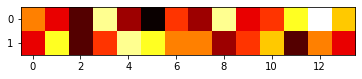

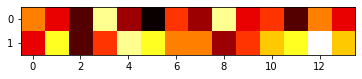

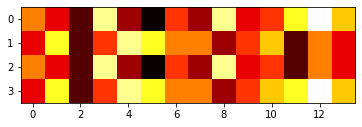

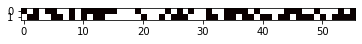

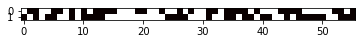

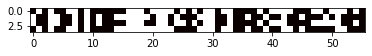

In [31]:
# Show cross over
bitstring_length = 14
population_crossover = initial_population(2, bitstring_length)
children = one_point_crossover(population_crossover[0], population_crossover[1])
fig2, ax2 = plt.subplots()
name = 'parent' + '.pdf'
name = '../../Figure/Q1/' + name
ax2.imshow(population_crossover, cmap='hot', interpolation='nearest')
plt.savefig(name, format='pdf')
plt.show()

fig3, ax3 = plt.subplots()
name = 'child' + '.pdf'
name = '../../Figure/Q1/' + name
ax3.imshow(children, cmap='hot', interpolation='nearest')
plt.savefig(name, format='pdf')
plt.show()
all = np.concatenate((population_crossover, children), axis=0)
fig4, ax4 = plt.subplots()
name = 'all' + '.pdf'
name = '../../Figure/Q1/' + name
ax4.imshow(all, cmap='hot', interpolation='nearest')
plt.savefig(name, format='pdf')
plt.show()

bitstring_length = 56
population_crossover = initial_population_ba(2, bitstring_length)
children = crossover(population_crossover[0], population_crossover[1])
fig2, ax2 = plt.subplots()
name = 'parent_ba' + '.pdf'
name = '../../Figure/Q1/' + name
ax2.imshow(population_crossover, cmap='hot', interpolation='nearest')
plt.savefig(name, format='pdf')
plt.show()

fig3, ax3 = plt.subplots()
name = 'child_ba' + '.pdf'
name = '../../Figure/Q1/' + name
ax3.imshow(children, cmap='hot', interpolation='nearest')
plt.savefig(name, format='pdf')
plt.show()
all = np.concatenate((population_crossover, children), axis=0)
fig4, ax4 = plt.subplots()
name = 'all_ba' + '.pdf'
name = '../../Figure/Q1/' + name
ax4.imshow(all, cmap='hot', interpolation='nearest')
plt.savefig(name, format='pdf')
plt.show()



[1 4 8 1 3 7 4 9 4 3 7 7 4 2]
[1 4 8 1 3 7 4 9 4 3 7 7 6 2]
[1 4 8 1 3 7 4 9 4 3 7 7 6 2]
[array([1, 4, 8, 1, 3, 7, 4, 9, 4, 3, 7, 7, 4, 2]), array([1, 4, 8, 1, 3, 7, 4, 9, 4, 3, 7, 7, 6, 2])]


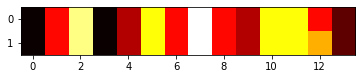

In [48]:
population = initial_population(1, 14)
print(population[0])
test = population[0].copy()
after_mutate = mutation(population[0], 1)
print(population[0])
print(after_mutate)
all = [test, after_mutate]
print(all)
fig4, ax4 = plt.subplots()
name = 'all_mutate' + '.pdf'
name = '../../Figure/Q1/' + name
ax4.imshow(all, cmap='hot', interpolation='nearest')
plt.savefig(name, format='pdf')
plt.show()



In [65]:
# genetic algorithm
def genetic_algorithm_show_best(pop_size, bitstring_length, mutation_rate, generations, tournament_size):
    # initialize population
    ans_history = np.zeros(generations)
    population = initial_population(pop_size, bitstring_length)
    # evaluate fitness
    # ranked_population = rank_by_fitness(population, lower, upper)
    # run the algorithm for the given number of generations
    for i in range(generations):
        print('Generation: ', i)
        # select parents
        parent1, dead1 = selection(population, tournament_size)
        parent2, dead2 = selection(population, tournament_size)
        if (parent1 == parent2).all():
            print('parent1 == parent2')
            continue
        # crossover parents
        children = one_point_crossover(parent1, parent2)
        child1 = children[0]
        child2 = children[1]
        # mutate children
        child1 = mutation(child1, mutation_rate)
        child2 = mutation(child2, mutation_rate)

        for i in range(len(population)):
            if (population[i] == dead1).all():
                population[i] = np.copy(child1)
                break
        for i in range(len(population)):
            if (population[i] == dead2).all():
                population[i] = np.copy(child2)
                # print('replaced', i)
                break
        best_cost = math.inf
        for i in population:
            if fitness(i) < best_cost:
                best_cost = fitness(i)
        ans_history[i] = best_cost        
        # print(population)
    best_sol = np.zeros(len(population[0]), dtype=int)
    best_cost = math.inf
    for i in population:
        if fitness(i) < best_cost:
            best_cost = fitness(i)
            best_sol = i
    return best_sol, population, ans_history

In [66]:
if __name__ == '__main__':
    # problem configuration
    bitstring_length = 14
    # algorithm configuration
    pop_size = 100
    mutation_rate = 0.05
    generations = 5000
    tournament_size = 10
    # execute the algorithm
    best, population, ans_his = genetic_algorithm_show_best(pop_size, bitstring_length, mutation_rate, generations, tournament_size)
    print("Done.")

Generation:  0
Generation:  1
Generation:  2
Generation:  3
Generation:  4
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Generation:  16
Generation:  17
Generation:  18
Generation:  19
Generation:  20
Generation:  21
Generation:  22
Generation:  23
Generation:  24
Generation:  25
Generation:  26
Generation:  27
Generation:  28
Generation:  29
Generation:  30
Generation:  31
Generation:  32
Generation:  33
Generation:  34
Generation:  35
Generation:  36
Generation:  37
Generation:  38
Generation:  39
Generation:  40
Generation:  41
Generation:  42
Generation:  43
Generation:  44
Generation:  45
Generation:  46
Generation:  47
Generation:  48
Generation:  49
Generation:  50
Generation:  51
Generation:  52
Generation:  53
Generation:  54
Generation:  55
Generation:  56
Generation:  57
parent1 == parent2
Generation:  58
Generation:  59
Generation:  60
Generation:  61

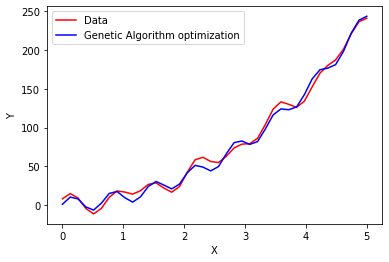

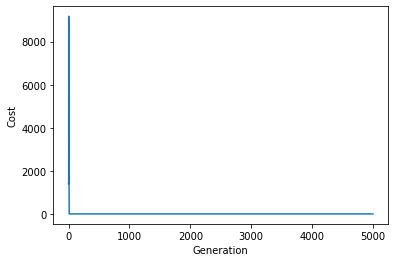

In [67]:
fig, ax = plt.subplots()

ax.plot(x, y, 'r', label='Data')
ax.plot(x, y_ans(bitstring_to_real(best)), 'b', label='Genetic Algorithm optimization')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(ans_his)
name = 'history' + '.pdf'
name = '../../Figure/Q1/' + name
ax.set_xlabel('Generation')
ax.set_ylabel('Cost')
plt.savefig(name, format='pdf')
plt.show()